# TP 1

In [1]:
from os import listdir
from os.path import isfile, join
fichiers = [f for f in listdir('tccon.latest.public') if isfile(join('tccon.latest.public', f))]

In [2]:
import netCDF4 as nc

 <span style="color:red">Selectionner une ville. La décrire brievement.</span>

In [3]:
ville = 23
data = nc.Dataset('tccon.latest.public/'+fichiers[ville])
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    source: Products retrieved from solar absorption spectra using the GGG2020 software
    file_creation: Created with Python 3.7.3; the library netCDF4 1.5.0.1; and the code concat_netcdf.py
    title: Atmospheric trace gas column-average dry-air mole fractions retrieved from solar absorption spectra measured by ground based Fourier Transform Infrared Spectrometers that are part of the Total Carbon Column Observing Network (TCCON)
    data_use_policy: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy
    auxiliary_data_description: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy/Auxiliary_Data
    more_information: https://tccon-wiki.caltech.edu
    tccon_reference: Wunch, D., G. C. Toon, J.-F. L. Blavier, R. A. Washenfelder, J. Notholt, B. J. Connor, D. W. T. Griffith, V. Sherlock, and P. O. Wennberg (2011), The total carbon column observing network, Philosophical 

La ville selectionnées est paris, elle contient blablabla


 <span style="color:red">Quel est le type de data.variables ?</span>
 <span style="color:red">Que contient elle ?</span>

In [4]:
print(data.variables.keys())

dict_keys(['time', 'prior_time', 'prior_altitude', 'ak_altitude', 'ak_pressure', 'ak_xco2', 'extrapolation_flags_ak_xco2', 'ak_xwco2', 'extrapolation_flags_ak_xwco2', 'ak_xlco2', 'extrapolation_flags_ak_xlco2', 'ak_xch4', 'extrapolation_flags_ak_xch4', 'ak_xhf', 'extrapolation_flags_ak_xhf', 'ak_xo2', 'extrapolation_flags_ak_xo2', 'ak_xn2o', 'extrapolation_flags_ak_xn2o', 'ak_xco', 'extrapolation_flags_ak_xco', 'ak_xh2o', 'extrapolation_flags_ak_xh2o', 'prior_temperature', 'prior_pressure', 'prior_density', 'prior_h2o', 'prior_co2', 'prior_n2o', 'prior_co', 'prior_ch4', 'prior_o2', 'prior_hf', 'prior_hdo', 'prior_gravity', 'prior_equivalent_latitude', 'prior_tropopause_altitude', 'prior_effective_latitude', 'prior_mid_tropospheric_potential_temperature', 'gfit_version', 'gsetup_version', 'year', 'day', 'hour', 'lat', 'long', 'zobs', 'zmin', 'solzen', 'azim', 'tout', 'pout', 'hout', 'sia', 'fvsi', 'wspd', 'wdir', 'xluft', 'xluft_error', 'xhf', 'xhf_error', 'xh2o', 'xh2o_error', 'xhdo', 

<span style="color:red">Créer les variables intéressante à l'étude sous forme de liste</span>

In [5]:
xco2 = data.variables['xco2'][:]
xch4 = data.variables['xch4'][:]
time = data.variables['time'][:]
#print(data.variables['xco2'])

<span style="color:red">Faire un tracer d'une variable du temps</span>

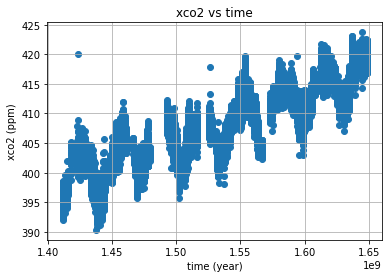

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(time,xco2)
plt.title('xco2 vs time')
plt.ylabel('xco2 (ppm)')
plt.xlabel('time (year)')
plt.grid()
plt.show()

<span style="color:red">Expliquer le graphique obtenu, que pouvons nous dire de ses données ? Est ce en accord avec ce que le traceur du site donne</span>

Réponse, bruit, trou, temps chelou

<span style="color:red">Quel est l unité du temps ? Modifier la pour la rendre plus facile à lire et tracer à nouveau.</span>

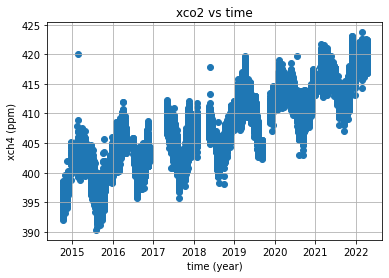

In [7]:
time = time/3600/24/365 + 1970

plt.figure()
plt.scatter(time,xco2)
plt.title('xco2 vs time')
plt.ylabel('xch4 (ppm)')
plt.xlabel('time (year)')
plt.grid()
plt.show()

# TP 2

<span style="color:red">Il existe des mesures peu précise qu'on souhaite éliminer. Si le fleg xco2 est a 1, alors il faut retirer  la ligne</span>

137


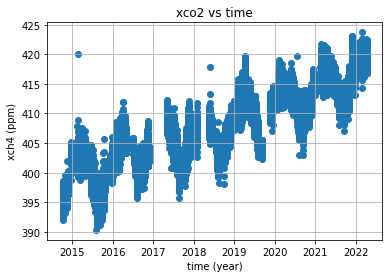

In [11]:
flag = data.variables['extrapolation_flags_ak_xco2'][:]
xco2_flag0 = []
time_flag0 = []
for i in range(len(xco2)):
    if flag[i] == 0:
        xco2_flag0 += [xco2[i]]
        time_flag0 += [time[i]]
        
print('Nombre de flag :',len(xco2) - len(xco2_flag0))
        
plt.figure()
plt.scatter(time_flag0,xco2_flag0)
plt.title('xco2 vs time')
plt.ylabel('xch4 (ppm)')
plt.xlabel('time (year)')
plt.grid()
plt.show()

<span style="color:red">Calcul de moyenne journalière.</span>

<span style="color:red">Calcul de la variation journalière.</span>

<span style="color:red">Différence jours/nuit</span>

<span style="color:red">Calcul de moyenne annuel, fit</span>

[ 2.58470978e+00 -4.81011532e+03]


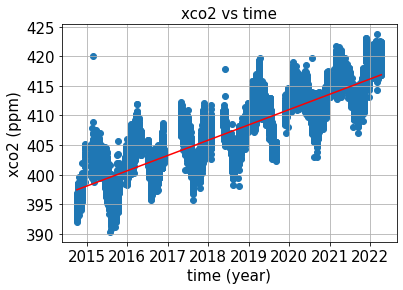

In [15]:
import numpy as np
from scipy.optimize import curve_fit

def f(t,a,b):
    t = np.array(t)
    return a*t + b

popt, pcov = curve_fit(f,time_flag0, xco2_flag0, p0=[10,400])

print(popt)
A = popt[0]
B = popt[1]

plt.figure()
plt.title('xco2 vs time', fontsize=15)
plt.scatter(time_flag0,xco2_flag0)
plt.plot(time_flag0, f(time_flag0,A,B),'r-')
plt.ylabel('xco2 (ppm)', fontsize=15)
plt.xlabel('time (year)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

<span style="color:red">Trouver une fonction de fit qui serait intéressante pour discuter des data</span>

In [9]:
import numpy as np
from scipy.optimize import curve_fit

def f(t,a,b,c,d,e):
    t = np.array(t)
    return a*t + b*np.cos(c*t + d) + e

popt, pcov = curve_fit(f,time_flag0, xco2_flag0, p0=[10,0.1,2*np.pi/365,0,1])

print(popt)
A = popt[0]
B = popt[1]
C = popt[2]
D = popt[3]
E = popt[4]

[ 2.45422026e+00  3.53281771e+00 -6.29556869e+00 -4.76329466e+02
 -4.54621733e+03]


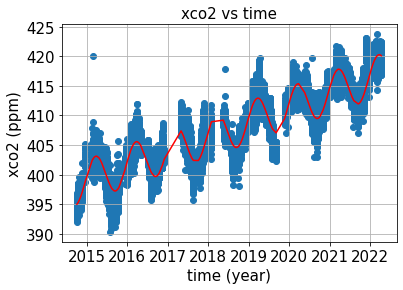

In [10]:
plt.figure()
plt.title('xco2 vs time', fontsize=15)
# plt.scatter(time,xch4)
# plt.scatter(time,flag)
plt.scatter(time_flag0,xco2_flag0)
plt.plot(time_flag0, f(time_flag0,A,B,C,D,E),'r-')
plt.ylabel('xco2 (ppm)', fontsize=15)
plt.xlabel('time (year)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

# TP 3

<span style="color:red">Changer de ville, comparer, discuter (ville, campagne, critique)</span>